#### Gurvir Boparai, 217797457



# Problem Statement:

The objective is to automate the loan eligibility process based on customer details. We have a dataset that includes information such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more.

## Step1:
**load the loan.csv file from data folder as a pandas dataframe and visualize the first 5 rows of the dataframe.**

In [1]:
import pandas as pd

def load_data(address):
    df = pd.read_csv(address) # use built in pandas function to read & load data from a given address
    return df

df = load_data('data/loan.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Step2: 
**Explore the data**

In [2]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Complete the following function to create a histogram for each of the numerical features.

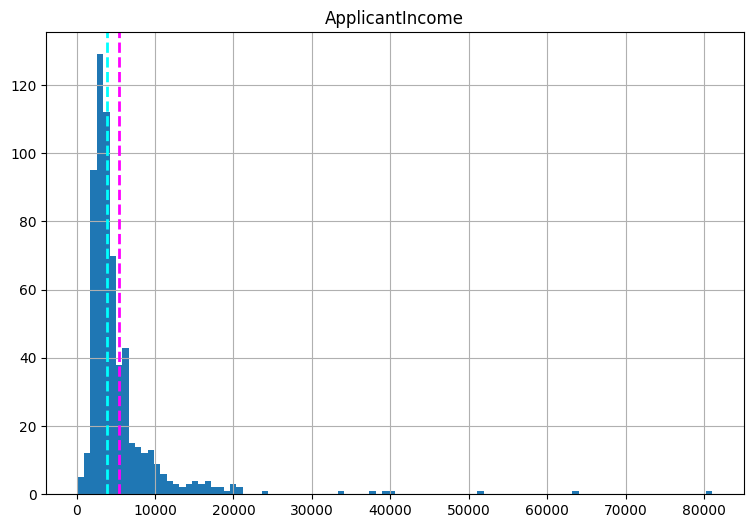

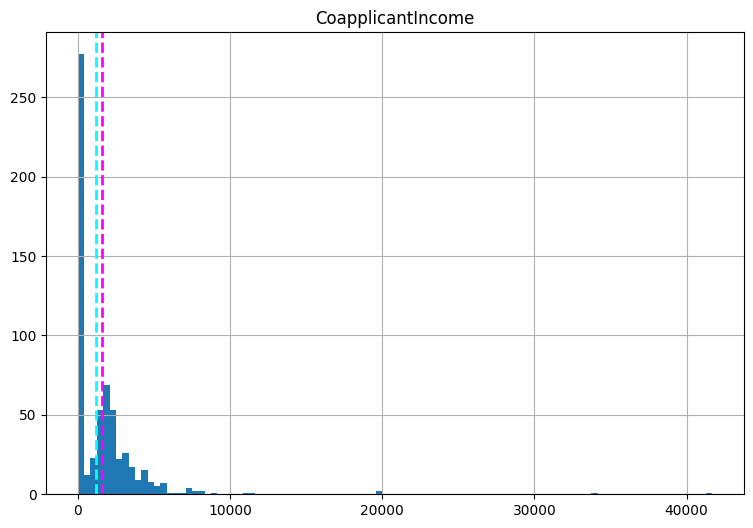

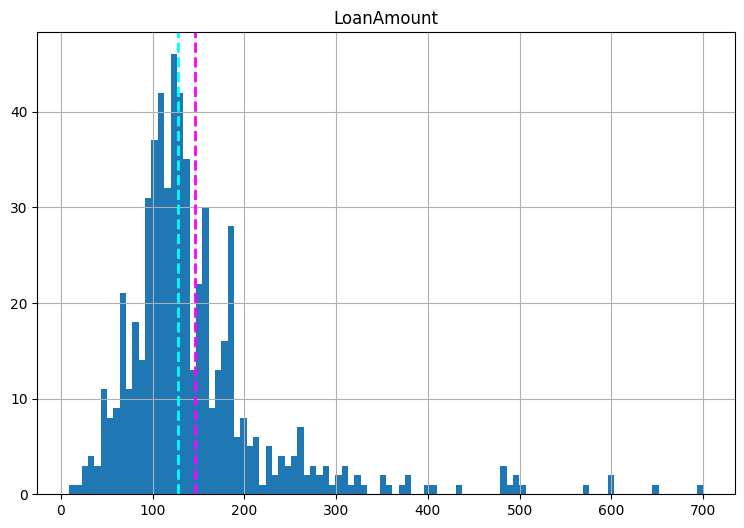

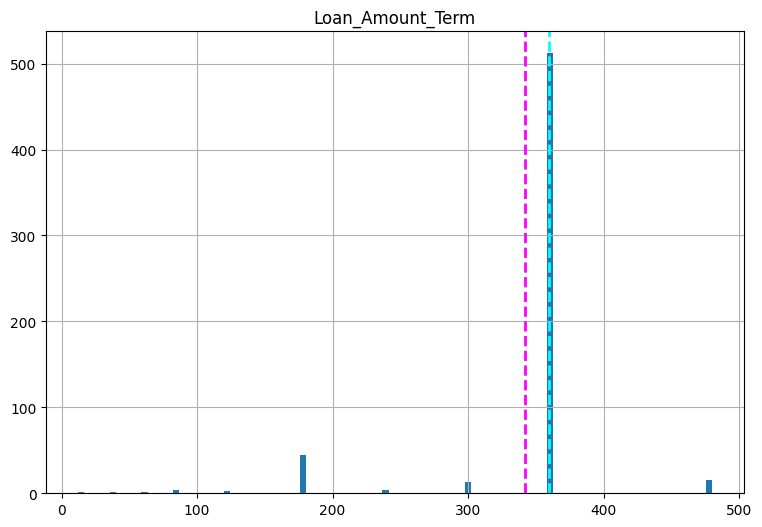

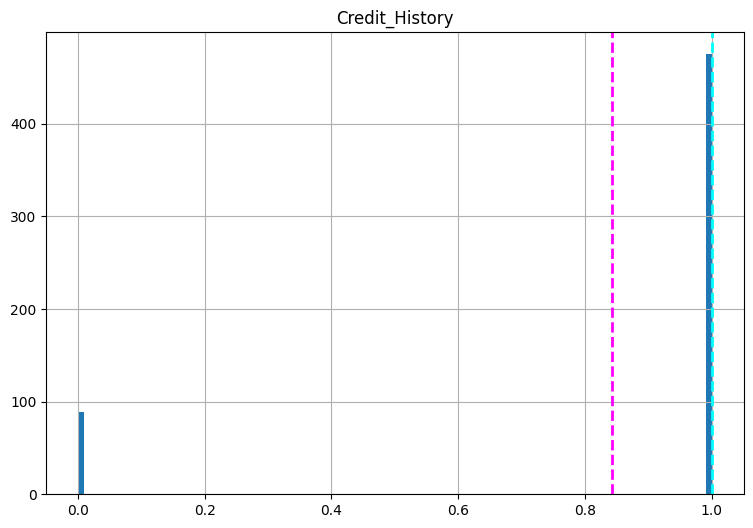

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histogram(df, col):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col] # store column names from our dataframe
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

# this will display a histogram for each of the features listed in the data
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numeric_features:
    plot_histogram(df, col)
plt.show()

Now complete the following function to compare the distribution of samples per label for each feature by plotting a boxplot.

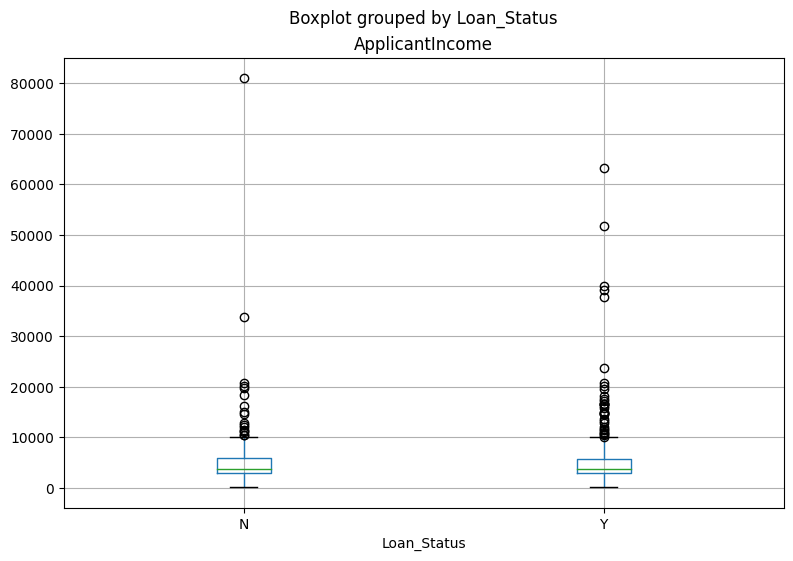

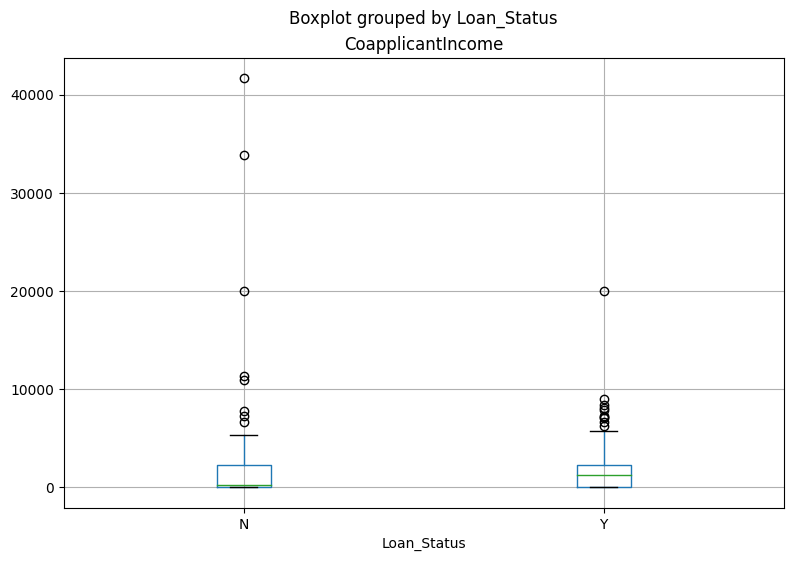

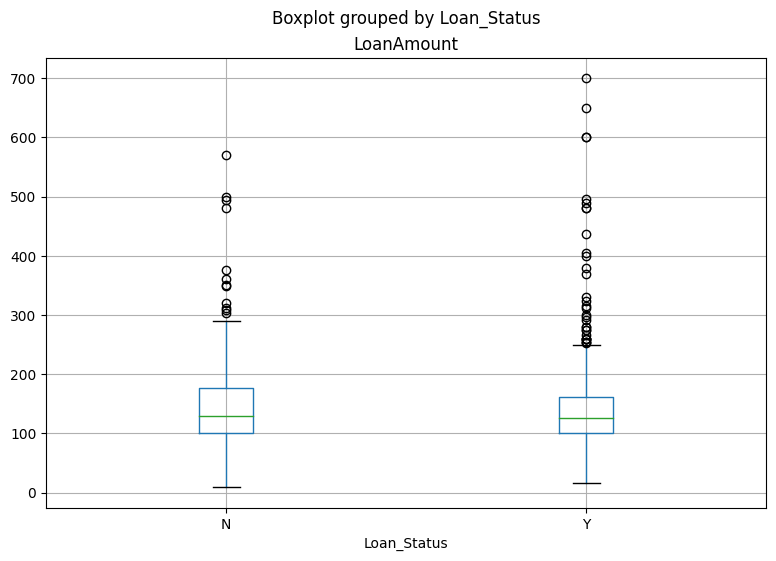

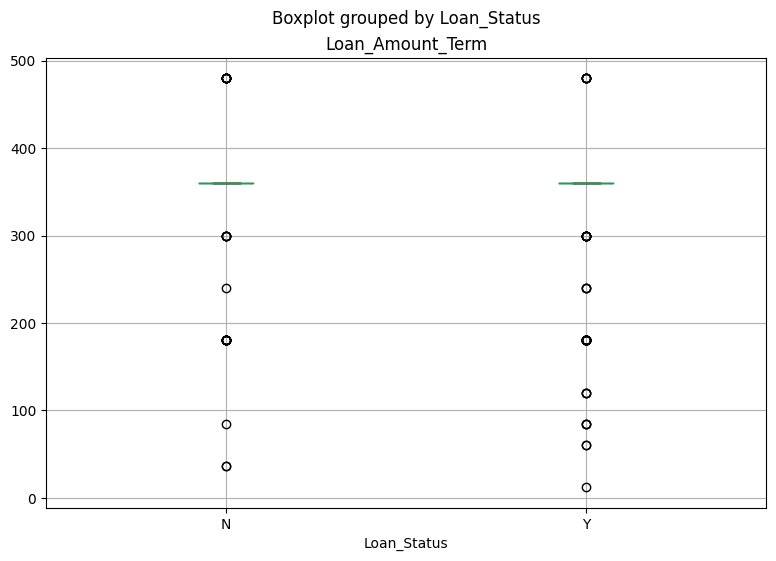

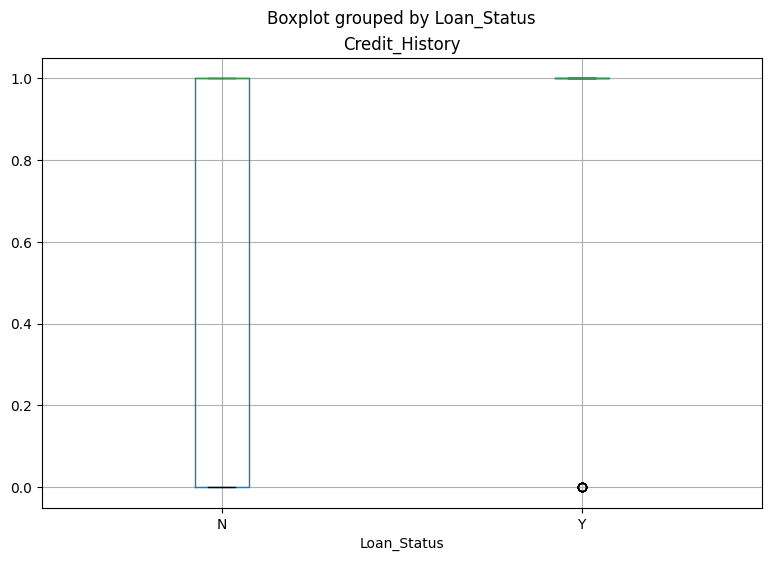

In [4]:
def plot_boxplot(df, col):
    fig = plt.figure(figsize=(9, 6)) # create a new figure
    ax = fig.gca() # gets the axes of the figure 
    df.boxplot(column=col, by="Loan_Status", ax=ax) # create boxplot grouped by loan status
    plt.title(col)
    plt.show()

# loop through each column and display a boxplot 
for col in numeric_features:
    plot_boxplot(df, col)

Now Complete the function below, to plot a bar chart showing the count of samples of discrete features.

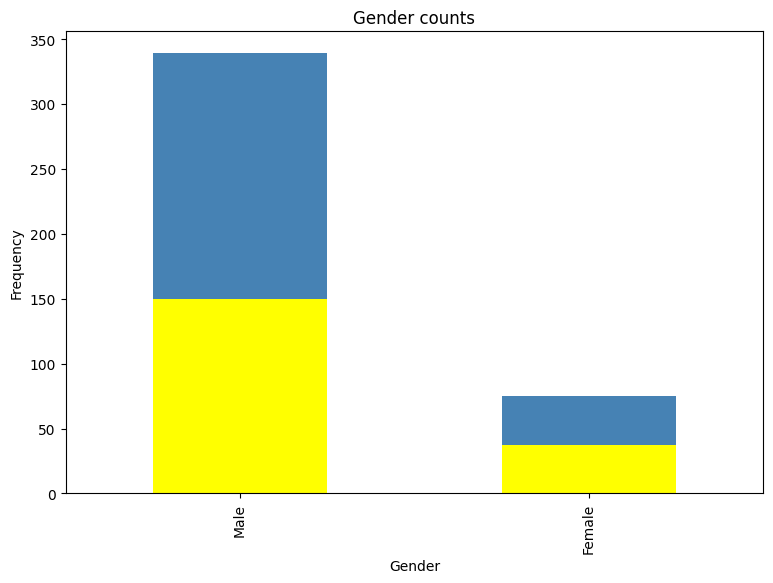

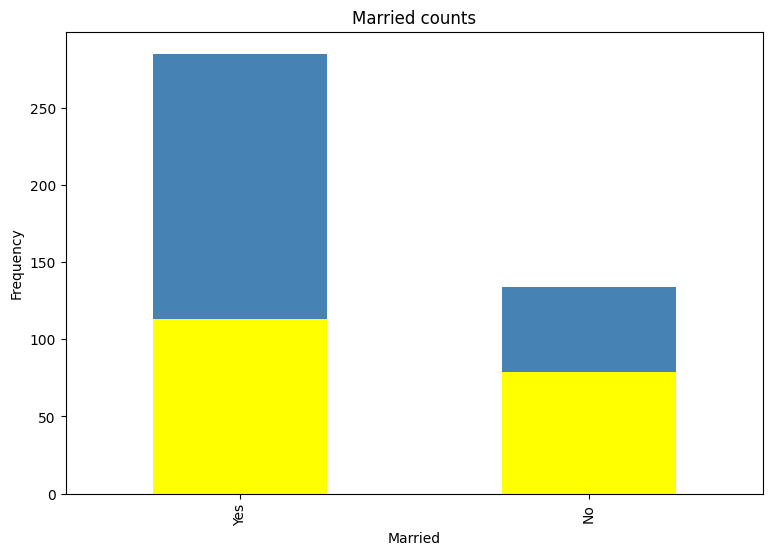

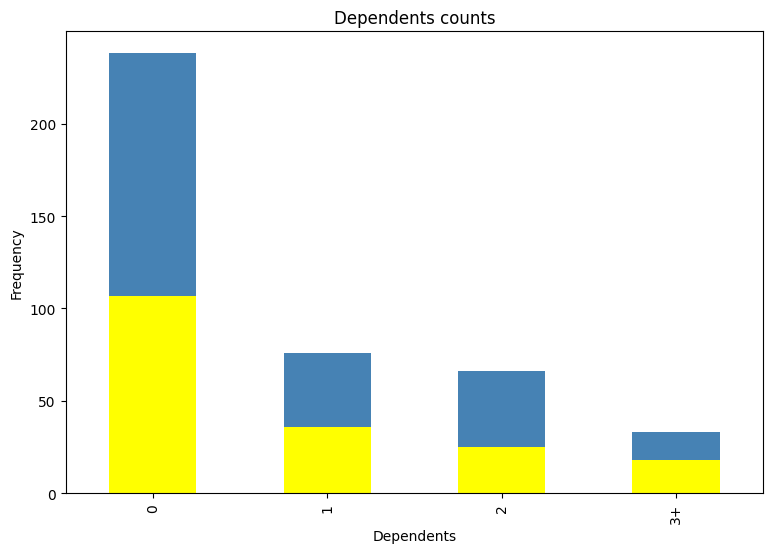

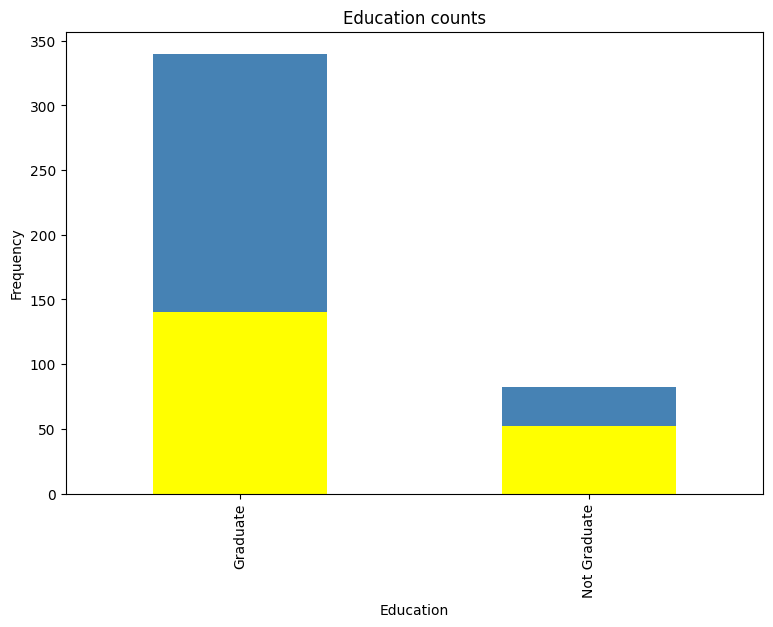

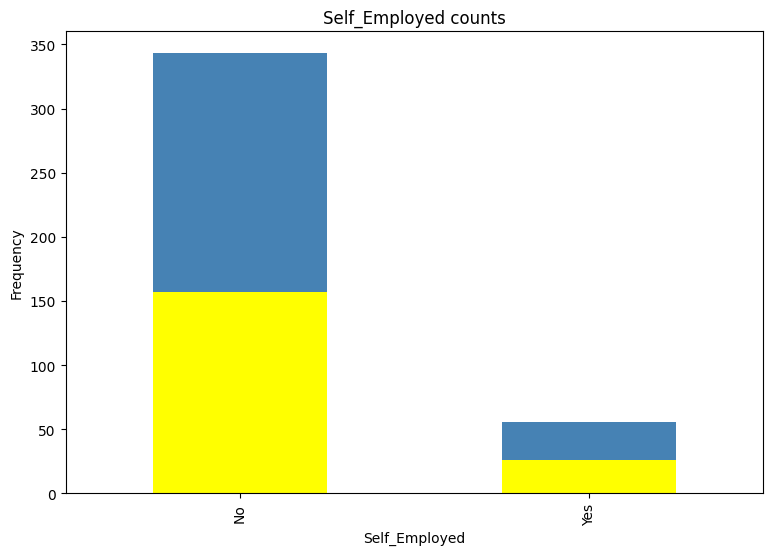

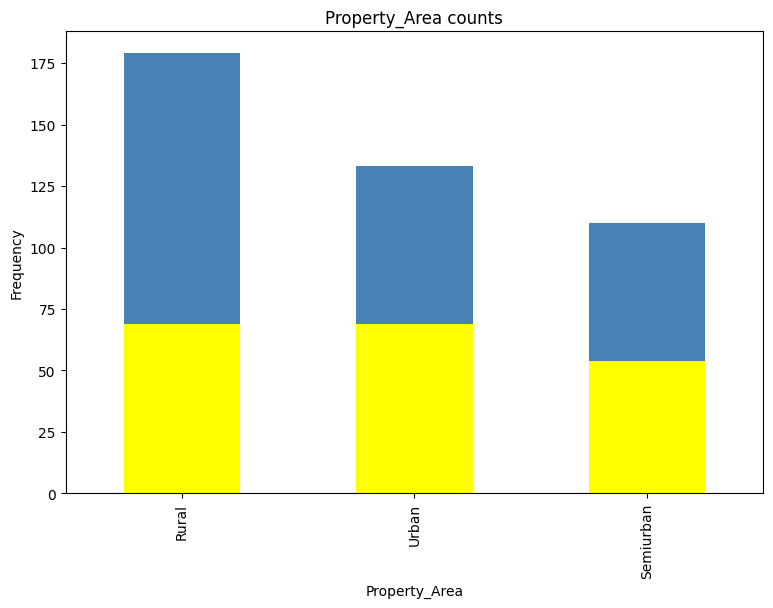

In [5]:
def plot_barchart(df, col):
    approved_counts = df[df['Loan_Status'] == 'Y'][col].value_counts()
    denied_counts = df[df['Loan_Status'] == 'N'][col].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    approved_counts.plot.bar(ax = ax, color='steelblue')
    denied_counts.plot.bar(ax = ax, color='yellow')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_features:
    plot_barchart(df, col)

---
**Question:**
- **Can you share any interesting insights or observations you made during this visualization process? Consider aspects such as feature distributions, class separation, potential outliers, or any other patterns you noticed. How might these insights inform your approach to modeling or preprocessing in the next steps?"**

**Answer:**
- First I noticed that 'ApplicantIncome' and 'CoapplicantIncome' have a positively skewed distribution. This suggests that while some applicants have high income, the majority applying for loans have lower incomes. 
    - I might consider creating a new feature that represents the total income of the applicant and coapplicant.
    - I might consider transforming the data using log transformation to make the distribution more normal.
- Next I notice that "Loan_Amount_Term' is negatively skewed. This could suggest that longer loan terms are more common and easier to approve.
    - I might consider handling the outliers by either removing them or replacing with the median value.
- Looking at the boxplots, I notice that for 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount' show that the interquartile range is smaller compared to the data range. This can indicate the data is concentrarted around the median. I can also see that these have many outliers, thus suggesting that I need to handle them when preproccessing.
- I would most likely need to figure out which features correlate with each other, thus I would need to explore correlation, possibly using a correlation matrix.


---

## Step3:
**Handling missing values**

In [6]:
def count_the_missing_values_of_each_column(df):
    missing_values_series = df.isnull().sum() # count the number of missing values in the df
    return missing_values_series
    
missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


**Complete the following functions to fill the missing values based on KNN**

**Part1**:

Since KNN could only handle numercal values, we should first transform the categorical variables into numerical ones:

In [7]:
from sklearn.preprocessing import OrdinalEncoder

def generate_the_df_with_categorical_features_encoded(df, cols):
    ordinal_encoder = OrdinalEncoder() # use class OriginalEncoder to replace categories 
    df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df[cols].values), columns=cols)
    df[cols] = df_encoded
    return df
    
categorical_features_with_missing_valuse = ['Gender', 'Married', 'Dependents', 'Self_Employed']

df = generate_the_df_with_categorical_features_encoded(df, categorical_features_with_missing_valuse)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


**part2**: 

Now that we've transformed the data lets use KNN to impute the missing values:

In [8]:
from sklearn.impute import KNNImputer
import numpy as np

def impute_the_Gender_missing_values(df):  
    knn_imputer = KNNImputer() # use KNNInputer to fill or predict missing values
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = pd.DataFrame(knn_imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)
    return df

df = impute_the_Gender_missing_values(df)

In [9]:
missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,Graduate,0.0,5849.0,0.0,147.8,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,Graduate,0.0,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,Graduate,1.0,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,Not Graduate,0.0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,Graduate,0.0,6000.0,0.0,141.0,360.0,1.0,Urban,Y


## Step4:

**Preparing data for prediction**

Now complete the following function to separate features from labels and then split the training set from testing set with test_size being 30% of the data and set the random_state to be zero

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status']) # use fit_transform to encode target variable 
    # Separate features from label
    X, y = df[features], df[label]
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    return X_train, X_test, y_train, y_test
    
features = ['Gender','Married','Dependents','Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
            'Property_Area']
label = 'Loan_Status'

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 429
Test cases: 185


## Step5:

**Lets begin by training a KNN model**

First complete the following function to generate a pipeline:

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

def generate_knn_pipeline(df, ordinal_categorical_feature, onehot_categorical_feature, numerical_features):
    # Define categorical and numerical features
    c1_idx = [df.columns.get_loc(item) for item in ordinal_categorical_feature]
    c2_idx = [df.columns.get_loc(item) for item in onehot_categorical_feature]
    n_idx = [df.columns.get_loc(item) for item in numerical_features]
    
    # Create transformers for numerical and categorical features
    ordinal_categorical_transformer = Pipeline(
        steps=[
            ('ordinal', OrdinalEncoder(handle_unknown='error'))
        ]
    )
    
    onehot_categorical_transformer = Pipeline(
        steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]
    )

    numerical_transformer = Pipeline(
        steps=[
            ('scaler', StandardScaler())
        ]
    )
    
    # Apply transformers to features using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat1', ordinal_categorical_transformer, c1_idx),
            ('cat2', onehot_categorical_transformer, c2_idx),
            ('num', numerical_transformer, n_idx),
        ])
    
    # Define the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=3)
    
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', knn_model)
    ])

    return pipeline

ordinal_categorical_feature = ['Education']
onehot_categorical_feature = ['Property_Area']
numerical_features = df.columns.difference(ordinal_categorical_feature + onehot_categorical_feature + ['Loan_Status'])

pipeline = generate_knn_pipeline(df, ordinal_categorical_feature, onehot_categorical_feature, numerical_features)

---
**Question:**
- **We have employed both the Ordinal encoder and the OneHot encoder in this exercise for encoding different categorical features. Can you provide a rationale for the choice of encoder for each feature? In other words, why did we choose to use the Ordinal encoder for certain features and the OneHot encoder for others? What considerations or characteristics of the features have influenced our decision in selecting the appropriate encoder for each case?**

**Answer:**
- Depending on the characteristics of the features an encoder is chosen. 
    - Ordinal categorical features are variables with an order or ranking which have meaning. Thus, ordinal encoding, which maintains the hierarchy of the categories, can be used to encode these. Since the 'Education' feature can be either "Graduate" or "Not Graduate", I assume that someone who is a non-graduate is a lower ranking than a graduate.
    - OneHot categorical features are variables with no inherent order or ranking amongst them. The onehot encoding scheme creates a binary vector for the category. For the 'Property_Area' feature, the areas are nominal categories with no order (Urban, Rural, and Semiurban).
---

Now complete the following snippet to make prediction and evaluate the results:

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test,predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 26  25]
 [ 17 117]] 

Accuracy: 0.772972972972973
Overall Precision: 0.823943661971831
Overall Recall: 0.8731343283582089


## Step6: 
**Lets make the pipeline comprehensive and include the missing value imputation in the pipeline**

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

df = load_data('data/loan.csv')

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0)

# Define categorical and numerical features
ordinal_categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']
c1_idx = [df.columns.get_loc(item) for item in ordinal_categorical_features]
onehot_categorical_features = ['Property_Area']
c2_idx = [df.columns.get_loc(item) for item in onehot_categorical_features]
numerical_features = df.columns.difference(ordinal_categorical_features + onehot_categorical_features + ['Loan_Status'])
n_idx = [df.columns.get_loc(item) for item in numerical_features]

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

ordinal_categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='error'))
])

onehot_categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

column_imputer = Pipeline(steps=[
    ('imputer0', KNNImputer())
])

# Apply transformers to features using ColumnTransformer
feature_transformer = ColumnTransformer(
    transformers=[
        ('cat1', ordinal_categorical_transformer, c1_idx),
        ('cat2', onehot_categorical_transformer, c2_idx),
        ('num', numerical_transformer, n_idx),
    ])

missing_value_imputer = ColumnTransformer(
    transformers=[
        ('imputer', column_imputer, c1_idx + c2_idx + n_idx)
    ])

# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Create the pipeline
pipeline = Pipeline(
    steps=[
        ('transformer',feature_transformer),
        ('imputer', missing_value_imputer),
        ('knn_model', knn_model)
    ]
)
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [10]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 9, 7, 8])])),
                ('imputer',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer0',
                                                                   KNNImputer())]),
                                                  [0, 1, 2, 3, 4, 10, 5, 6, 9,
                                                   7, 8])])),
                ('knn_model', KNeighborsClassifier(n_neighbors=3))])

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 25  26]
 [ 15 119]] 

Accuracy: 0.7783783783783784
Overall Precision: 0.8206896551724138
Overall Recall: 0.8880597014925373


## Step7: 
**Lets try other classifiers in the pipeline**

Complete the following snippet to replace the KNN model with Naive Bayse model

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pipeline.set_params(knn_model=gnb)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [10]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 9, 7, 8])])),
                ('imputer',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer0',
                                                                   KNNImputer())]),
                                                  [0, 1, 2, 3, 4, 10, 5, 6, 9,
                                                   7, 8])])),
                ('knn_model', GaussianNB())])

In [17]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 22  29]
 [  5 129]] 

Accuracy: 0.8162162162162162
Overall Precision: 0.8164556962025317
Overall Recall: 0.9626865671641791


Complete the following snippet to replace the Naive Bayse model with SVM

In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma=10)
pipeline.set_params(knn_model=svc)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [10]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 9, 7, 8])])),
                ('imputer',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer0',
                                                                   KNNImputer())]),
                                                  [0, 1, 2, 3, 4, 10, 5, 6, 9,
                                                   7, 8])])),
                ('knn_model', SVC(gamma=10, kernel='linear'))])

In [19]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Confusion Matrix:
 [[ 21  30]
 [  2 132]] 

Accuracy: 0.827027027027027
Overall Precision: 0.8148148148148148
Overall Recall: 0.9850746268656716


---
**Question:**
- **Among the various classification models implemented in this exercise, which one demonstrates superior performance in terms of the evaluation metrics such as accuracy, precision, and recall? Provide a detailed interpretation of the metrics and explain why you consider one model to be more effective than others in addressing the classification task. Consider aspects such as the balance between precision and recall, and any specific characteristics of the dataset that might influence your choice of the most effective model.**

**Answer**
- Based on the 3 different classification models, Support Vector Machine (SVM) demonstrates superior performance. 
    - In terms of accuracy, SVM has the highest (82.7%), followed by Naive Bayes(81.6%) then KNN (77%). Since accuracy measures the proportion of correctly classified instances out of total instances, this means SVM classified the highest percentage of instances.
    - In terms of precision, KNN has the highest (82%), followed by Naive Bayes (81.6%) then SVM (81.4%). Since precision measures the proportion of correctly predicted positives out of the total predicted positive instances, this means SVM scored the lowest, but still did very good in making few false positives.
    - In terms of recall, SVM has the highest (98.5%), followed by Naive Bayes (96%) then KNN (88.8%). Since recall measures the proportion of correctly predicted positive instances out of the actual positive instances, this means SVM correctly predicted almost all of actual positive instances.
- Overall, SVM is more effective because it is a balanced model with 82.7% accuracy, 81.4% precision and 98.5% recall. 
---

## Step 8:
**Considering the classification models covered in this lesson, implement a model to identify the single feature that provides the best separation for the classification task. Report the evaluation metrics of the model, including accuracy. Additionally, specify which feature is determined to be the most effective for classification.**

Resources:

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
randomForest = RandomForestClassifier(n_estimators=100, random_state=0)

# Create pipeline
pipeline_randomForest = Pipeline(
    steps=[
        ('transformer', feature_transformer),
        ('imputer', missing_value_imputer),
        ('randomForest', randomForest)
    ]
)

# fit the pipeline on the training data
pipeline_randomForest.fit(X_train,y_train)

# get predictions from test data
predicitons_randomForest = pipeline_randomForest.predict(X_test)

pipeline_randomForest



Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 2, 3, 4]),
                                                 ('cat2',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [10]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [5, 6, 9, 7, 8])])),
                ('imputer',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer0',
                                                                   KNNImputer())]),
                                                  [0, 1, 2, 3, 4, 10, 5, 6, 9,
                                                   7, 8])])),
                ('randomForest', RandomForestClassifier(random_state=0))])

After creating the pipeline for the randomforest, find the most important feature

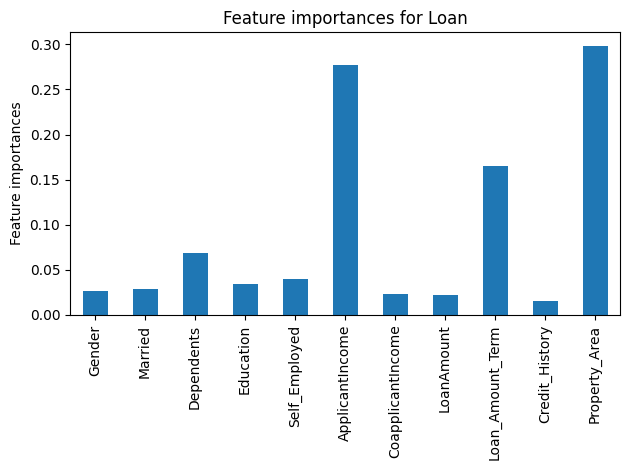

Most Important Feature for Classification: Property_Area


In [21]:
# Get feature importance
feature_importance = randomForest.feature_importances_ # use built in feature importance of random forest
most_important_feature_index = np.argmax(feature_importance) # get the index of the most important
most_important_feature = features[most_important_feature_index]

# display a plot to show feature importance
forest_importances = pd.Series(feature_importance, index=features)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances for Loan")
ax.set_ylabel("Feature importances")
fig.tight_layout()
plt.show()

print("Most Important Feature for Classification:", most_important_feature)

In [22]:
# Get evaluation metrics 
cm_rf = confusion_matrix(y_test, predicitons_randomForest)
print('Confusion Matrix:\n', cm_rf, '\n')
print('Accuracy:', accuracy_score(y_test, predicitons_randomForest))
print("Overall Precision:", precision_score(y_test, predicitons_randomForest))
print("Overall Recall:", recall_score(y_test, predicitons_randomForest))

Confusion Matrix:
 [[ 23  28]
 [ 14 120]] 

Accuracy: 0.772972972972973
Overall Precision: 0.8108108108108109
Overall Recall: 0.8955223880597015


**Answer**
- Using the random forest classifier, we can determine that the Property_Area is the most important feature, followed by ApplicantIncome.
- Overall, the random forest classifier is not that great in terms of accuracy, precision and recall. We can still see that the SVM is the best model for this dataset.
- According to the official documentation of scikit, using the feature_importance_ of random forests: "they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree". Thus, it is possible for high cardinality features to be misleading.

## Step 9:

**Revisit Step 2 in your analysis. Identify and implement one preprocessing technique covered in this course that has not been applied yet. Apply this technique to the best-performing model from Step 7 and report its impact on the evaluation metrics.**

*Hint: Think about data points that might significantly deviate from the overall pattern and explore techniques to identify and handle such instances. This step is often useful for improving model performance.*

In [23]:
# use IQR removal 
def iqr_outlier_removal(X, y):
    Q1 = X.quantile(0.25, numeric_only = True)
    Q3 = X.quantile(0.75, numeric_only = True)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((X < lower_bound) | (X > upper_bound)).any(axis=1)
    X_filtered = X[~outliers]
    y_filtered = y[~outliers]
    return X_filtered, y_filtered

# apply IQR removal
X_train_filtered, y_train_filtered = iqr_outlier_removal(X_train, y_train)
X_test_filtered, y_test_filtered = iqr_outlier_removal(X_test, y_test)

# set to SVM
pipeline.set_params(knn_model=svc)

# Refit the pipeline with filtered data
pipeline.fit(X_train_filtered, y_train_filtered)

# Get predictions from the filtered data
predictions_filtered = pipeline.predict(X_test_filtered)

# evaluation metrics
cm_filtered = confusion_matrix(y_test_filtered, predictions_filtered)
print('Confusion Matrix after IQR outlier removal:\n', cm_filtered, '\n')
print('Accuracy after IQR outlier removal:', accuracy_score(y_test_filtered, predictions_filtered))
print("Overall Precision after IQR outlier removal:", precision_score(y_test_filtered, predictions_filtered))
print("Overall Recall after IQR outlier removal:", recall_score(y_test_filtered, predictions_filtered))


Confusion Matrix after IQR outlier removal:
 [[  0  16]
 [  0 105]] 

Accuracy after IQR outlier removal: 0.8677685950413223
Overall Precision after IQR outlier removal: 0.8677685950413223
Overall Recall after IQR outlier removal: 1.0


C:\Users\Gurvir\AppData\Local\Temp\ipykernel_15324\47826.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((X < lower_bound) | (X > upper_bound)).any(axis=1)


**Answer:**
- After doing outlier detection and removal. We can see a significatn change in the SVM model.
- Accuracy and Precision have increased to 86.7% and recall is now 100%.  
- This means:
    - The model is now classifying 86.7% of instances out of total instances correctly.
    - The model is now predicting 86.7% positives out of the total predicted postive instances.
    - The model is now predicting 100% positive instances out of the actual positive instances.